# 5팀 _ PTJ
#### 팀원 : 남승현, 원광연, 임세홍, 최예준, 김수진

## 목차
- 분석 목적 및 개요
- 데이터 불러오기
- 데이터 전처리
- 데이터 시각화
- 데이터 분석 결론

## 1. 분석 목적 : 같은 상표지만 지역별로 휘발유 가격이 다른 이유를 알아보기 위해

|분석 요소|분석 내용|시각화|
|:---------:|:---------:|:-----:|
|상표별 가격|상표가 가격에 미치는 영향|DataFrame|
|지역별 가격 |주유소가 위치한 지역이 가격에 미치는 영향|barplot|
|기간별 가격|2020년 1~12월까지 기간별 가격의 흐름과 변동|Lineplot|
|기간+지역|지역별 기간에 따른 가격 변동|heatmap|
|상표별+기간|주유소 상표별 기간에 따른 가격 변동|Lineplot|
|지역+상표 가격|위치한 지역이 상표별 주유소의 가격에 미치는 영향|boxplot| 
|상표별 가격 순위 (10)||DataFrame|
|지역별 가격 낮은 순위 (10)||DataFrame|


## 2. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
plt.rcParams['font.family'] = 'Malgun Gothic'


In [3]:
seoul_first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv',encoding='cp949')
seoul_first
seoul_second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv',encoding='cp949')
seoul_second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 월간(202007~202012),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.0,1402.65,1211.10,0.0
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.0,1393.00,1203.00,0.0
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.0,1338.42,1148.42,0.0
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.0,1292.00,1092.37,0.0


In [4]:
seoul=pd.concat([seoul_first,seoul_second])[1:]
seoul
# seoul.info()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-4-081dcadfc12c>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## 3. 데이터 전처리

In [5]:
# 상표별 가격 ex) 같은 상표별 지역에 따른 가격 차이, 같은 지역의 다른 상표별 가격 차이
seoul.pivot_table('휘발유',index=['상표'],aggfunc='mean').sort_values('휘발유', ascending=False)

,휘발유
상표,
SK에너지,1517.494476
GS칼텍스,1480.077478
S-OIL,1434.653561
현대오일뱅크,1427.582881
자가상표,1414.056800
알뜰주유소,1355.216043
알뜰(ex),1330.236667


In [6]:
# 지역별 가격 ex) 다른 구에 위치한 같은 주유소의 가격 
seoul.pivot_table('휘발유',index=['지역'],aggfunc='mean')

,휘발유
지역,
서울 강남구,1601.450148
서울 강동구,1483.317188
서울 강북구,1358.062500
서울 강서구,1407.981343
서울 관악구,1440.764404
서울 광진구,1397.081373
서울 구로구,1429.092710
서울 금천구,1390.482484
서울 노원구,1434.355371


In [7]:
# 기간별 가격 ex) 기간별 전체 주유소의 가격
seoul.pivot_table('휘발유',index=['기간'],aggfunc='mean')

,휘발유
기간,
2020년 01월,1645.069016
2020년 02월,1621.318790
2020년 03월,1555.867149
2020년 04월,1416.519840
2020년 05월,1349.253273
2020년 06월,1417.995248
2020년 07월,1453.244929
2020년 08월,1456.751700
2020년 09월,1445.365598


In [8]:
# 기간별+지역 ex)  기간별 다른 지역의 동일한 상호 가격, 기간별 같은 지역의 다른 상호 가격
seoul.pivot_table('휘발유',index=['지역','기간'],aggfunc='mean')

휘발유
지역      기간                    
서울 강남구  2020년 01월  1771.252750
        2020년 02월  1754.086750
        2020년 03월  1703.356500
        2020년 04월  1580.068250
        2020년 05월  1504.057250
        2020년 06월  1540.887000
        2020년 07월  1569.828250
        2020년 08월  1574.318750
        2020년 09월  1554.379744
        2020년 10월  1550.467436
        2020년 11월  1543.167368
        2020년 12월  1564.309211
서울 강동구  2020년 01월  1646.620000
        2020년 02월  1618.855625
        2020년 03월  1556.316250
        2020년 04월  1419.257500
        2020년 05월  1355.564375
        2020년 06월  1423.028750
        2020년 07월  1466.495625
        2020년 08월  1472.664375
        2020년 09월  1475.308750
        2020년 10월  1455.615000
        2020년 11월  1442.685625
        2020년 12월  1467.394375
서울 강북구  2020년 01월  1538.201538
        2020년 02월  1513.650000
        2020년 03월  1438.353846
        2020년 04월  1270.588462
        2020년 05월  1216.083846
        2020년 06월  1312.159231
        2020년 07월  1354.995385
        2020년 08월  1357.291538
        2020년 09월  1345.636154
        2020년 10월  1313.496923
        2020년 11월  1282.606923
        2020년 12월  1353.686154
서울 강서구  2020년 01월  1589.972941
        2020년 02월  1561.463235
        2020년 03월  1482.930000
        2020년 04월  1345.198529
        2020년 05월  1289.162941
        2020년 06월  1361.172059
        2020년 07월  1389.361818
        2020년 08월  1391.417273
        2020년 09월  1382.606061
        2020년 10월  1359.710909
        2020년 11월  1340.857879
        2020년 12월  1396.406970
서울 관악구  2020년 01월  1607.645000
        2020년 02월  1587.043750
        2020년 03월  1534.165000
        2020년 04월  1406.089375
        2020년 05월  1315.498750
        2020년 06월  1378.938750
        2020년 07월  1419.215000
        2020년 08월  1419.962500
        2020년 09월  1417.950588
        2020년 10월  1402.724375
        2020년 11월  1385.651875
        2020년 12월  1415.713750
서울 광진구  2020년 01월  1572.152941
        2020년 02월  1542.480000
        2020년 03월  1464.437059
        2020년 04월  1331.376471
        2020년 05월  1265.823529
        2020년 06월  1347.382941
        2020년 07월  1384.752941
        2020년 08월  1390.255882
        2020년 09월  1379.150000
        2020년 10월  1353.141176
        2020년 11월  1340.816471
        2020년 12월  1393.207059
서울 구로구  2020년 01월  1616.440476
        2020년 02월  1595.444286
        2020년 03월  1521.046364
        2020년 04월  1383.372727
        2020년 05월  1311.445455
        2020년 06월  1381.291818
        2020년 07월  1410.962727
        2020년 08월  1409.382727
        2020년 09월  1394.080000
        2020년 10월  1371.432727
        2020년 11월  1361.139091
        2020년 12월  1409.151364
서울 금천구  2020년 01월  1576.257692
        2020년 02월  1539.090000
        2020년 03월  1475.475385
        2020년 04월  1340.901538
        2020년 05월  1270.743077
        2020년 06월  1345.436923
        2020년 07월  1382.904615
        2020년 08월  1391.076154
        2020년 09월  1374.235385
        2020년 10월  1319.637143
        2020년 11월  1304.122308
        2020년 12월  1371.359231
서울 노원구  2020년 01월  1618.683333
        2020년 02월  1591.327333
        2020년 03월  1521.299333
        2020년 04월  1380.264667
        2020년 05월  1313.816667
        2020년 06월  1380.069333
        2020년 07월  1415.372667
        2020년 08월  1408.412857
        2020년 09월  1400.465000
        2020년 10월  1386.324286
        2020년 11월  1372.405000
        2020년 12월  1410.942143
서울 도봉구  2020년 01월  1557.124444
        2020년 02월  1528.988889
        2020년 03월  1446.056667
        2020년 04월  1289.199444
        2020년 05월  1230.591667
        2020년 06월  1335.514444
        2020년 07월  1378.916667
        2020년 08월  1381.295556
        2020년 09월  1367.510556
        2020년 10월  1335.398889
        2020년 11월  1316.588889
        2020년 12월  1373.663889
서울 동대문구 2020년 01월  1587.584545
        2020년 02월  1562.787727
        2020년 03월  1494.990455
        2020년 04월  1354.626087
        2020년 05월  1268.465455
        2020년 06월  1359.237727
        2020년 07월  1401.585909
        2020년 08월  1401.4213

In [9]:
# 상표별+기간 ex) 기간별 상표에 따른 가격
seoul.pivot_table('휘발유',index=['상표','기간'],aggfunc='mean')

휘발유
상표     기간                    
GS칼텍스  2020년 01월  1649.163037
       2020년 02월  1629.434000
       2020년 03월  1564.551630
       2020년 04월  1425.538815
       2020년 05월  1360.742889
       2020년 06월  1430.263926
       2020년 07월  1462.905481
       2020년 08월  1466.097778
       2020년 09월  1452.076917
       2020년 10월  1434.914046
       2020년 11월  1421.370385
       2020년 12월  1458.842422
S-OIL  2020년 01월  1609.241558
       2020년 02월  1579.703766
       2020년 03월  1513.002564
       2020년 04월  1377.580380
       2020년 05월  1310.830759
       2020년 06월  1386.484051
       2020년 07월  1422.074615
       2020년 08월  1423.384156
       2020년 09월  1413.180513
       2020년 10월  1389.801154
       2020년 11월  1376.192821
       2020년 12월  1421.082597
SK에너지  2020년 01월  1686.106387
       2020년 02월  1661.636963
       2020년 03월  1599.924660
       2020년 04월  1460.704921
       2020년 05월  1391.230053
       2020년 06월  1456.155789
       2020년 07월  1492.530986
       2020년 08월  1493.231875
       2020년 09월  1484.715035
       2020년 10월  1469.725874
       2020년 11월  1454.408112
       2020년 12월  1491.330979
알뜰(ex) 2020년 01월  1511.060000
       2020년 02월  1510.170000
       2020년 03월  1433.840000
       2020년 04월  1265.970000
       2020년 05월  1190.970000
       2020년 06월  1262.500000
       2020년 07월  1312.940000
       2020년 08월  1304.900000
       2020년 09월  1294.900000
       2020년 10월  1272.390000
       2020년 11월  1254.100000
       2020년 12월  1349.100000
알뜰주유소  2020년 01월  1544.460909
       2020년 02월  1509.454545
       2020년 03월  1423.624545
       2020년 04월  1279.865455
       2020년 05월  1224.023636
       2020년 06월  1319.577273
       2020년 07월  1356.894545
       2020년 08월  1357.750000
       2020년 09월  1340.371667
       2020년 10월  1299.447692
       2020년 11월  1284.646154
       2020년 12월  1348.091538
자가상표   2020년 01월  1588.260000
       2020년 02월  1540.415000
       2020년 03월  1482.050000
       2020년 04월  1341.165000
       2020년 05월  1283.645000
       2020년 06월  1363.000000
       2020년 07월  1397.675000
       2020년 08월  1398.000000
       2020년 09월  1379.000000
       2020년 10월  1358.790000
       2020년 11월  1342.000000
       2020년 12월  1407.580000
현대오일뱅크 2020년 01월  1592.306625
       2020년 02월  1569.565570
       2020년 03월  1499.371875
       2020년 04월  1356.816875
       2020년 05월  1288.949750
       2020년 06월  1389.041600
       2020년 07월  1427.920645
       2020년 08월  1435.887258
       2020년 09월  1425.478387
       2020년 10월  1400.811951
       2020년 11월  1382.143226
       2020년 12월  1423.942661

In [10]:
# 지역+상표 가격 차이
seoul.pivot_table('휘발유',index=['지역','상표'],aggfunc='mean')

휘발유
지역      상표                 
서울 강남구  GS칼텍스   1606.316224
        S-OIL   1582.626056
        SK에너지   1616.140269
        현대오일뱅크  1573.183919
서울 강동구  GS칼텍스   1463.951333
        S-OIL   1492.732917
        SK에너지   1537.520000
        현대오일뱅크  1428.232667
서울 강북구  GS칼텍스   1353.261667
        S-OIL   1348.366250
        SK에너지   1369.021698
        현대오일뱅크  1353.985814
서울 강서구  GS칼텍스   1418.653452
        S-OIL   1420.370833
        SK에너지   1426.880986
        알뜰주유소   1322.087500
        현대오일뱅크  1387.686176
서울 관악구  GS칼텍스   1450.452889
        S-OIL   1435.575417
        SK에너지   1455.996833
        알뜰주유소   1375.628125
        현대오일뱅크  1436.947500
서울 광진구  GS칼텍스   1409.874667
        S-OIL   1384.027778
        SK에너지   1426.009783
        알뜰주유소   1354.878333
        현대오일뱅크  1374.642600
서울 구로구  GS칼텍스   1522.530417
        S-OIL   1426.179028
        SK에너지   1417.576415
        알뜰주유소   1385.675833
        현대오일뱅크  1388.263377
서울 금천구  GS칼텍스   1382.317059
        S-OIL   1374.861111
        SK에너지   1427.995122
        알뜰주유소   1359.324667
        현대오일뱅크  1383.041935
서울 노원구  GS칼텍스   1420.481806
        S-OIL   1412.337778
        SK에너지   1458.491875
        현대오일뱅크  1467.670000
서울 도봉구  GS칼텍스   1373.918056
        S-OIL   1400.277500
        SK에너지   1363.801304
        현대오일뱅크  1366.442097
서울 동대문구 GS칼텍스   1385.476324
        S-OIL   1402.211212
        SK에너지   1428.660581
        현대오일뱅크  1409.620132
서울 동작구  GS칼텍스   1414.218611
        S-OIL   1413.730000
        SK에너지   1501.085000
        현대오일뱅크  1414.220600
서울 마포구  GS칼텍스   1439.495000
        S-OIL   1549.250294
        SK에너지   1572.353000
        현대오일뱅크  1450.765385
서울 서대문구 GS칼텍스   1392.389714
        S-OIL   1442.193056
        SK에너지   1425.201558
        현대오일뱅크  1376.199091
서울 서초구  GS칼텍스   1448.688383
        S-OIL   1518.503833
        SK에너지   1561.134769
        알뜰(ex)  1330.236667
        현대오일뱅크  1456.837895
서울 성동구  GS칼텍스   1604.831667
        S-OIL   1383.278333
        SK에너지   1497.955854
        자가상표    1368.819167
        현대오일뱅크  1485.261875
서울 성북구  GS칼텍스   1362.020357
        S-OIL   1361.692586
        SK에너지   1386.921930
        알뜰주유소   1321.211667
        현대오일뱅크  1351.412632
서울 송파구  GS칼텍스   1414.916333
        S-OIL   1421.904792
        SK에너지   1441.470519
        현대오일뱅크  1411.268925
서울 양천구  GS칼텍스   1365.838000
        S-OIL   1317.706667
        SK에너지   1438.075833
        알뜰주유소   1344.739167
        현대오일뱅크  1392.311400
서울 영등포구 GS칼텍스   1538.658739
        S-OIL   1401.300968
        SK에너지   1544.661143
        알뜰주유소   1343.594167
        현대오일뱅크  1411.422368
서울 용산구  GS칼텍스   1806.439167
        SK에너지   1907.432414
        현대오일뱅크  1807.390303
서울 은평구  GS칼텍스   1378.811667
        S-OIL   1375.332500
        SK에너지   1381.282830
        자가상표    1455.814615
        현대오일뱅크  1369.117813
서울 종로구  GS칼텍스   2024.467917
        S-OIL   1469.235000
        SK에너지   1804.357143
        현대오일뱅크  1615.330000
서울 중구   GS칼텍스   2038.513721
        S-OIL   1773.441667
        SK에너지   1975.886500
        알뜰주유소   1448.230833
        현대오일뱅크  1659.430833
서울 중랑구  GS칼텍스   1361.112500
        S-OIL   1371.421333
        SK에너지   1389.504151
        현대오일뱅크  1345.915263

## 4. 데이터 시각화(그래프)

In [11]:
# 상표별 가격 
seoul.pivot_table('휘발유',index=['상표'],aggfunc='mean').sort_values('휘발유', ascending=False)

,휘발유
상표,
SK에너지,1517.494476
GS칼텍스,1480.077478
S-OIL,1434.653561
현대오일뱅크,1427.582881
자가상표,1414.056800
알뜰주유소,1355.216043
알뜰(ex),1330.236667


#### Visualization 기법 : 
#### 데이터 분석 : 알뜰 주유소와 같은 저가 브랜드 휘발유 가격이 다른 브랜드의 휘발유 가격과 비교해서 유의미한 차이가 있다는 것을 발견.
---

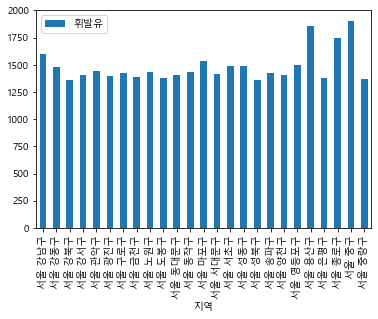

<Figure size 3600x720 with 0 Axes>

In [12]:
# 지역별 가격
seoul.pivot_table('휘발유',index=['지역'],aggfunc='mean').plot(kind='bar')
plt.figure(figsize=(50, 10))
plt.show()

#### Visualization 기법 : 데이터들 간의 막대 그래프 높이 비교가 눈에 쉽게 들어와 지역별 휘발유 평균가격 비교에 대한 이해가 다른 그래프보다 더 쉬움.  
#### 데이터 분석 : 서울 지역내에서 가격 비교를 했을 때 강남구가 가장 높을거라는 예상외로 용산구와 중구가 휘발유 가격이 가장 높다는 것을 알 수 있다.
---

<AxesSubplot:xlabel='기간', ylabel='휘발유'>

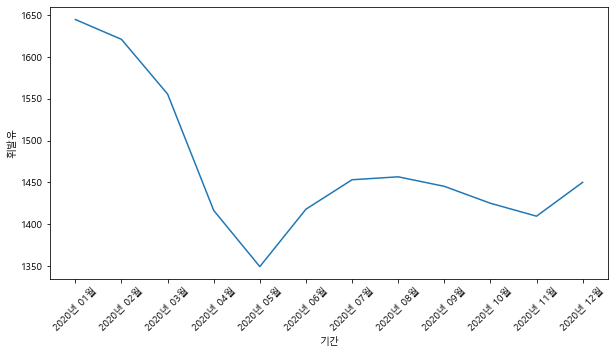

In [13]:
# 기간별 가격 
seoul_3 = seoul.pivot_table('휘발유',index=['기간'],aggfunc='mean')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 45)
sns.lineplot(data=seoul_3, x = "기간", y = "휘발유")

#### Visualization 기법 : 기간별로 휘발유 가격 추이를 그래프 선의 흐름으로 쉽게 알아볼 수 있다.
#### 데이터 분석 : 모든 상표를 통틀어 휘발유 평균 가격을 기간별로 확인한 결과 1~2월이 다른 기간보다 높았다.
- - -

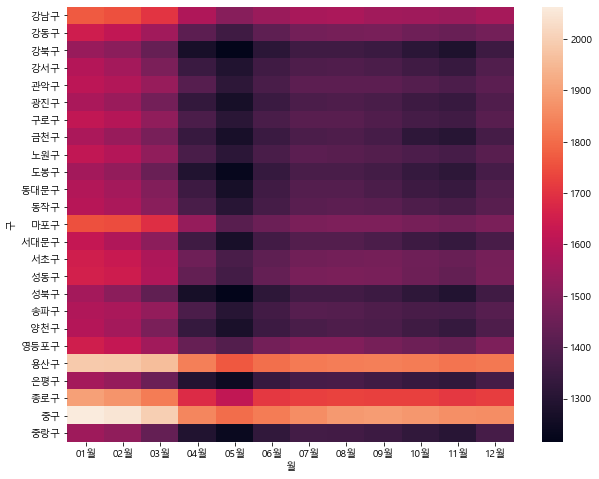

In [14]:
# 기간과 지역에 대한 휘발유 가격
seoul['시'] = seoul['지역'].str.split(" ").str[0]
seoul['구'] = seoul['지역'].str.split(" ").str[1]
seoul['월'] = seoul['기간'].str.split(" ").str[1]
seoul_loc = seoul.pivot_table(values='휘발유',index=['구'],columns=['월'],aggfunc='mean')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10,8))
sns.heatmap(seoul_loc)
plt.show()


#### Visualization 기법 : 기간과 지역에 대한 휘발유 가격을 색상 차이로 한눈에 알아볼 수 있어서
#### 데이터 분석 : 서울내 지역별 기간에 따른 가격차이를 확인했을 때 평균 가격이 높은 용산구와 중구는 일년 내내 가격 변화가 크게 없다. (중구에 서울역 위치)

---

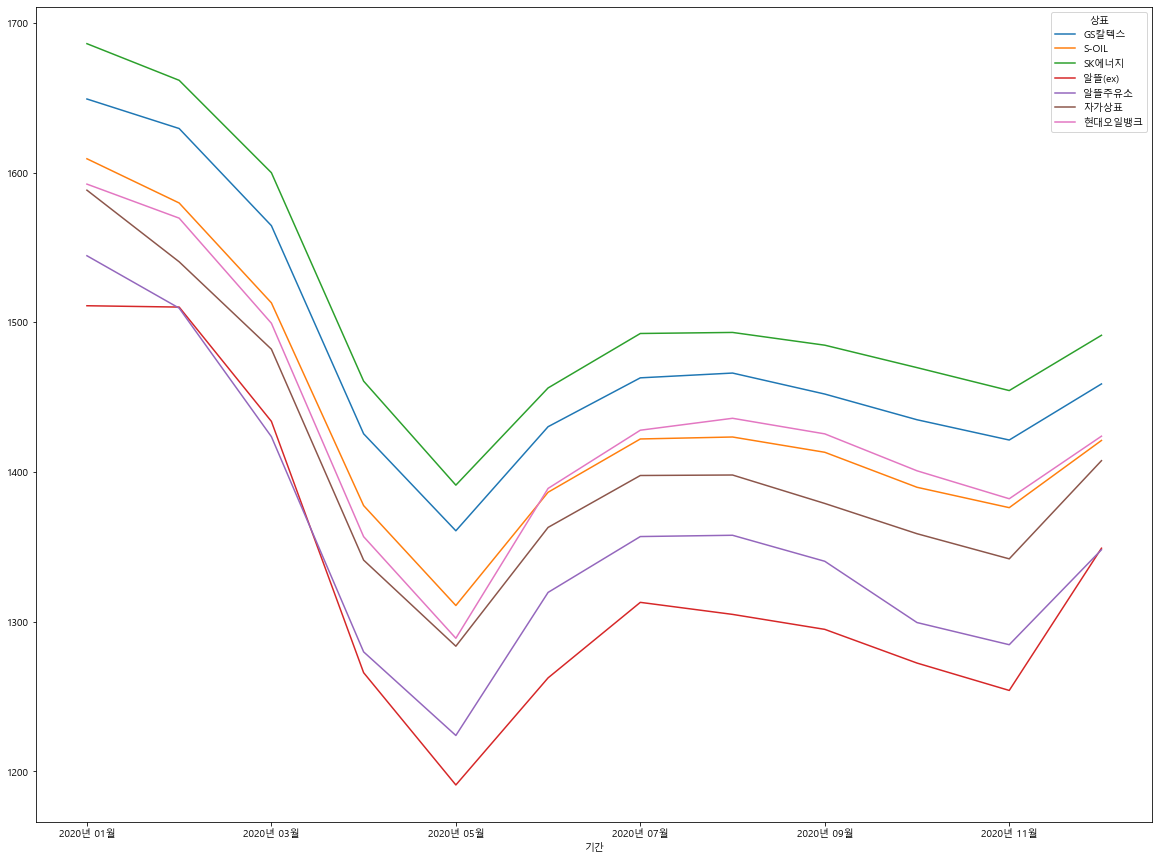

In [15]:
# 상표별+기간
seoul.pivot_table('휘발유',index=['상표','기간'],aggfunc='mean')
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams["figure.figsize"] = (20,15)
seoul.pivot_table('휘발유','기간','상표',aggfunc='mean').plot()
plt.show()


#### Visualization 기법 : 상표별 일정 기간의 가격 추이의 비교가 한눈에 들어와서 
#### 데이터 분석 : 상표별 기간내 가격 변화를 비교했을 때 가격의 변동의 흐름이 비슷하게 일어난다는 것을 알 수 있다.


---

<AxesSubplot:xlabel='상표', ylabel='휘발유'>

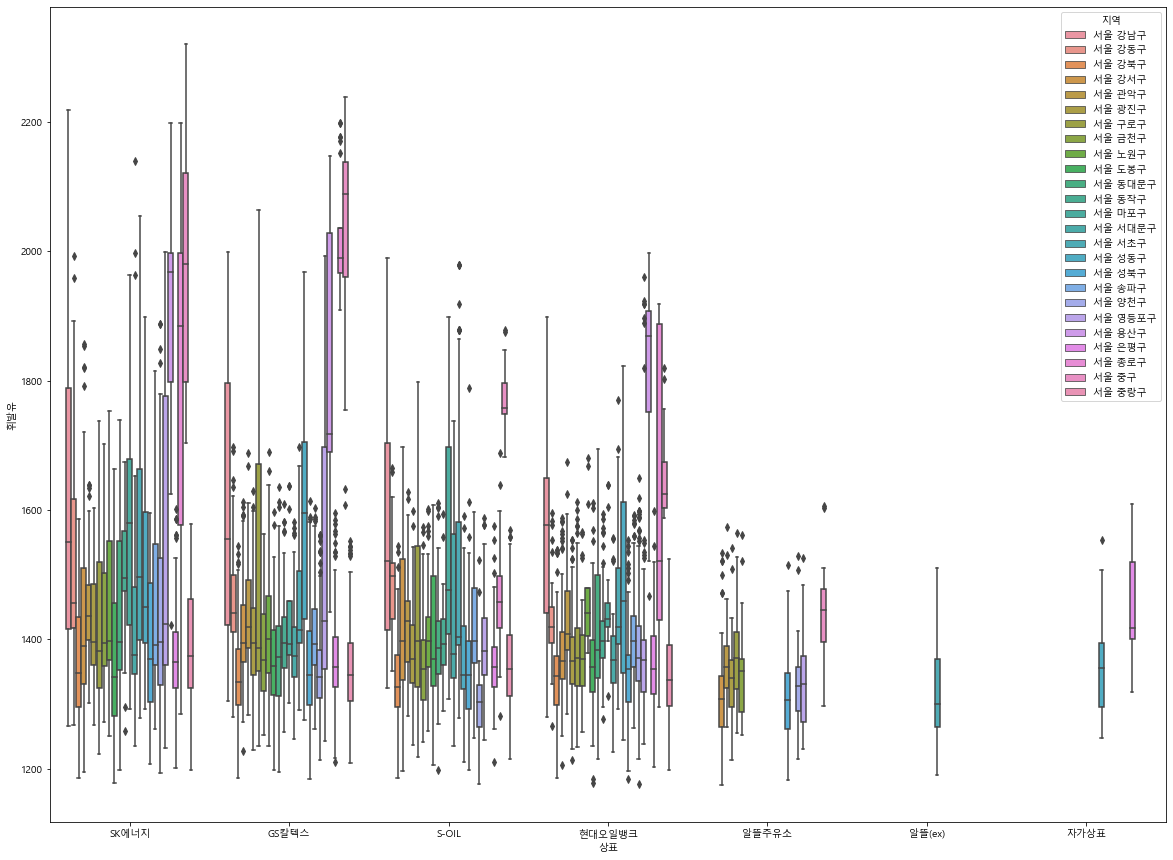

In [16]:
# 지역+상표 가격 차이
plt.rcParams['font.family'] = 'Malgun Gothic'
s1 = seoul.pivot_table('휘발유',index=['지역','상표'],aggfunc='mean')
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams["figure.figsize"] = (20,15)
sns.boxplot(x = '상표', y = '휘발유', hue = '지역', data=seoul)


#### Visualization 기법 : 상표를 기준으로 지역에 따라 휘발유 가격의 차이를 보여주고 싶어서  
#### 데이터 분석 : 상표의 차이보다는 어느 지역에 위치했느냐가 휘발유 가격에 더 영향을 미친다는 것을 확인 할 수 있다.
---

In [17]:
# 상표별 높은 가격 순위 (10)
seoul_1=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=False).head(10)
seoul_1

,상표,휘발유,지역
2839,SK에너지,2320.55,서울 중구
2840,SK에너지,2278.14,서울 중구
2863,GS칼텍스,2238.00,서울 중구
2841,SK에너지,2227.74,서울 중구
2805,SK에너지,2224.84,서울 중구
85,SK에너지,2218.00,서울 강남구
2864,GS칼텍스,2215.69,서울 중구
2802,SK에너지,2214.70,서울 중구
86,SK에너지,2211.79,서울 강남구
2801,SK에너지,2210.29,서울 중구


#### Visualization 기법 : 상표에 따른 휘발유 높은 가격 순위를 지역과 함께 한눈에 볼 수 있어서 
#### 데이터 분석 
- 1~10위까지의 순위에 중구에 위치한 브랜드 주유소가 대부분(10개 중 8개가 sk에너지 / 2개가 gs칼텍스).
- 중구에 근무지가 밀집되어 있기 때문에 회사에서 주유를 지원해수는 회사원들이 주 이용객들이기 때문에 가격이 높아도 이용객 유지가능.
- 임대 상황과 경제상황에 따른 가격 변동: 중구와 강남이 임대료가 높기 때문에 휘발유 가격에도 영향을 미친다.
------------

In [18]:
# 지역별 가격 낮은 순위 (10)
seoul_2=pd.concat([seoul['상표'],seoul['휘발유'],seoul['지역']],axis=1).sort_values('휘발유', ascending=True).head(10)
seoul_2

,상표,휘발유,지역
611,알뜰주유소,1175.03,서울 강서구
467,알뜰주유소,1175.03,서울 강서구
2389,S-OIL,1177.10,서울 양천구
2395,현대오일뱅크,1177.10,서울 양천구
1215,SK에너지,1177.77,서울 도봉구
1155,현대오일뱅크,1178.32,서울 도봉구
1964,알뜰주유소,1183.26,서울 성북구
1209,현대오일뱅크,1184.10,서울 도봉구
1898,GS칼텍스,1184.42,서울 성북구
1928,현대오일뱅크,1184.42,서울 성북구


#### Visualization 기법 : 상표에 따른 휘발유 낮은 가격 순위를 한눈에 볼 수 있어서 
#### 데이터 분석 
- 낮은 순위를 살펴봤을 때 근무지역보다는 거주지역이 대부분이다.
- 저가 브랜드가 대부분 차지하고 있다는 것을 다시 한번 확인.
- 서울 중심지가 아니라 외곽지역에 위치한 주유소가 대부분
---

## 5. 데이터 분석 결과

서울 지역내에서 가격 비교를 했을 때 예상외로 용산구와 중구가 휘발유 가격이 가장 높다는 것을 알 수 있다.

모든 상표를 통틀어 휘발유 평균 가격을 기간별로 확인한 결과 1~2월이 다른 기간보다 높았다.

서울내 지역별 기간에 따른 가격차이를 확인했을 때 평균 가격이 높은 용산구와 중구는 일년 내내 가격 변화가 크게 없다. --> 서울역이 위치

상표별 기간내 가격 변화를 비교했을 때 가격의 변동의 흐름이 비슷하게 일어난다는 것을 알 수 있다.

상표의 차이보다는 어느 지역에 위치했느냐가 휘발유 가격에 더 영향을 미친다는 것을 확인 할 수 있다. --> 10개 중 8개가 sk에너지 / 2개가 gs칼텍스 --> 용산에 산 두개 --> 중구에 근무지가 밀집되어 있어 회사에서 주유를 지원해주는 회사원들이 주 이용객들이기 때문에 가격이 높아도 이용객 유지가능 --> 임대 상황과 경제상황에 따른 가격 변동: 중구와 강남이 임대료가 높기 때문에 휘발유 가격에도 영향을 미친다.

### 데이터 분석 결과 사용 가능성 : 
